# Diamond Prices
## Give an overview of the dataset structure by answering those questions:

In [112]:
import numpy as np
import pandas as pd
from pandas import DataFrame

df = pd.read_csv('diamonds.csv')
df.describe() # list some statistics for the number features in the dataset


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### How many samples and features are in the dataset?

In [113]:
print('Number of samples: ')
len(df)

Number of samples: 


53940

In [114]:
print('Number of features: ')
len(df.columns)

Number of features: 


10

### What are the feature data types?

In [115]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

### Are diamonds balanced across color, cut and clarity? (Hint: roughly 1:1 means balanced, e.g. 1:2 is a “1:2 imbalance”)

In [116]:
""""
Calculate the class distribution ratio of a feature by using the feature with the least samples as the basis for the calculation
"""
def ratio(df: DataFrame, feature: str):
    g = df.groupby([feature]).size().to_frame(name = "samples")
    min_samples = g.iloc[:, 0].min()
    g['ratio'] = round(g.iloc[:, 0] / min_samples, 1)
    return g

In [117]:
ratio(df, "color")

,samples,ratio
color,,
D,6775,2.4
E,9797,3.5
F,9542,3.4
G,11292,4.0
H,8304,3.0
I,5422,1.9
J,2808,1.0


Color has an imbalance of 1:4 from class J to F and over half the classes have at least an imbalance of 1:3 when compared to J

In [118]:
ratio(df, "cut")

,samples,ratio
cut,,
Fair,1610,1.0
Good,4906,3.0
Ideal,21551,13.4
Premium,13791,8.6
Very Good,12082,7.5


Cut has an even higher imbalance of 1:13.4 between Fair and Ideal. in general cut is very unbalanced

In [119]:
ratio(df, "clarity")

,samples,ratio
clarity,,
I1,741,1.0
IF,1790,2.4
SI1,13065,17.6
SI2,9194,12.4
VS1,8171,11.0
VS2,12258,16.5
VVS1,3655,4.9
VVS2,5066,6.8


Clarity has the worst imbalance of 1:17.6 between I1 and SI1 and apart from that is the most imbalanced feature of the three

### Visualize diamond prices using a histogram, boxplot and densityplot.

#### Answer this question:

* Is there trend visible in those plots? If yes, which is it and in whichplots can you see it?

<AxesSubplot: >

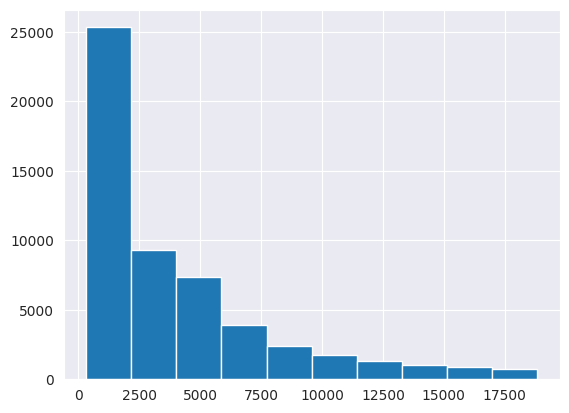

In [120]:
prices = df["price"]

prices.hist()

<AxesSubplot: >

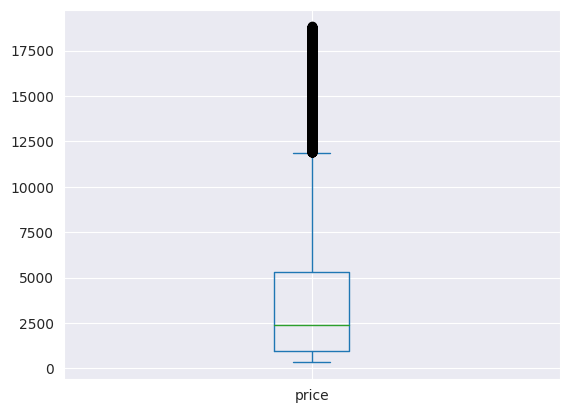

In [121]:
prices.plot.box()

<AxesSubplot: ylabel='Density'>

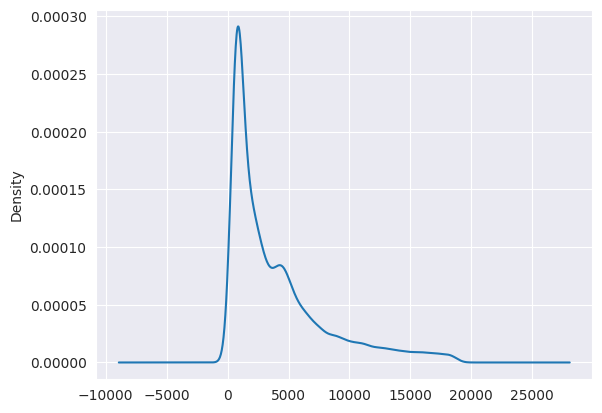

In [122]:
prices.plot.density()

The median price is about 2500, 75% are below 5000. (boxplot)
The other plots also show where most of the prices are.
We can see, the higher the price, the lower the number of diamonds. (density, hist)

### Calculate and state the mean, median, standard deviation, median absolute deviation (MAD), 1st and 3rd quartile (Q1 and Q3), and innerquartile range of the diamond price.

In [123]:
print("Diamond prices:")

print("mean: ", round(prices.mean(), 3))
print("median: ", round(prices.median(), 3))

mad = (prices - prices.mean()).abs().mean() # FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
print("mad: ", round(mad, 3))
print("std:", round(prices.std(), 3))

first_quantile = prices.quantile(0.25)
third_quantile = prices.quantile(0.75)
inner_quantile = third_quantile - first_quantile
print("1st quantile: ", round(first_quantile, 3))
print("3st quantile: ", round(third_quantile, 3))
print("inner quantile rang: ", round(inner_quantile, 3))


Diamond prices:
mean:  3932.8
median:  2401.0
mad:  3031.603
std: 3989.44
1st quantile:  950.0
3st quantile:  5324.25
inner quantile rang:  4374.25


In [124]:
prices.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

### Plot the diamond price against the carat values as a scatterplot.

Answer this question:
* Is there a trend visible in the plot? If yes, which is it?

<AxesSubplot: xlabel='carat', ylabel='price'>

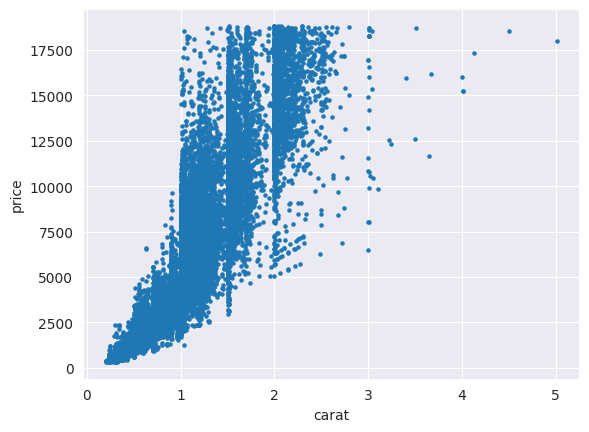

In [125]:
df.plot.scatter(y="price", x="carat", marker=".")

The price increases exponentially with the carat value of the diamond.

### Analyze the correlation between diamond price and diamond x, y, and z dimensions.

Answer those questions:
* Create pairwise plots for these features.
* Is there a trend visible between x, y, and z? If yes, which is it?
* Is there a trend visible between the dimensions and the price? If yes,which is it?•


In [126]:
#pd.plotting.scatter_matrix(df[["price", "x", "y", "z"]])

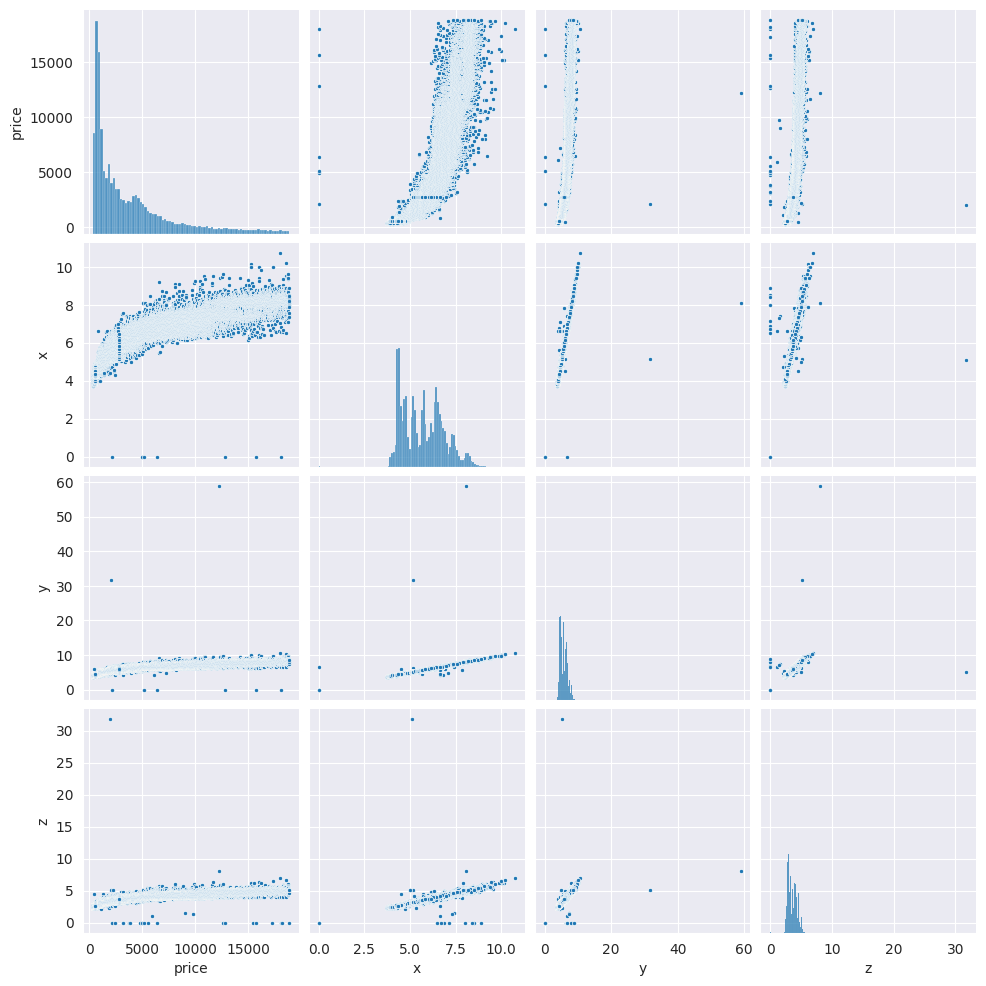

In [127]:
import seaborn as sns
sns.pairplot(df[["price", "x", "y", "z"]], markers=".")


In [128]:
print("Correlation:")
df[["price", "x", "y", "z"]].corr()

Correlation:


,price,x,y,z
price,1.000000,0.884435,0.865421,0.861249
x,0.884435,1.000000,0.974701,0.970772
y,0.865421,0.974701,1.000000,0.952006
z,0.861249,0.970772,0.952006,1.000000


Is there a trend between x, y, and z?
* yes, usually the bigger one dimension the bigger the other dimensions since all the dimensions have a pretty high linear correlation (> 0.95).

Is there a trend between the dimensions and the price?
* yes, the larger the diamond, the greater the price
* there is also a pretty strong linear correlation between the dimension and the price. Every dimension correlates between 0.86 - 0.88.

### Analyze diamond prices per diamond color.

* Create boxplots showing diamond price boxes for each diamond color(all boxes should be in one figure).
* Create densityplots showing diamond prices for each diamond color(all densities should be in one figure).
* Answer this question: is there a trend visible? If yes, which one?

price    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

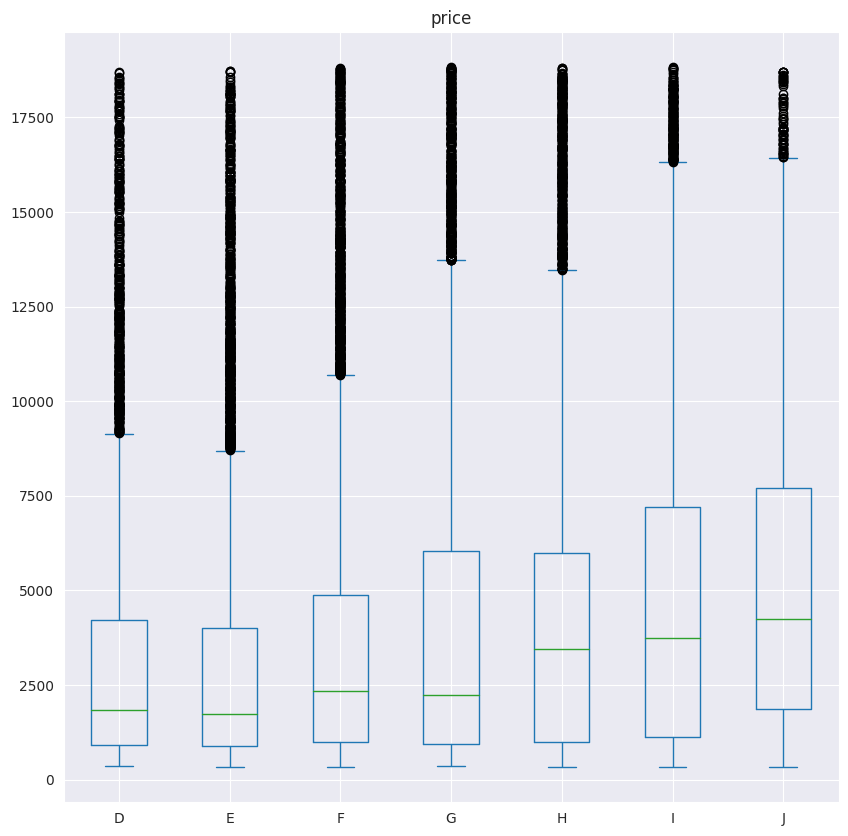

In [129]:
df[["price", "color"]].plot.box(by="color", figsize=(10,10))

<AxesSubplot: ylabel='Density'>

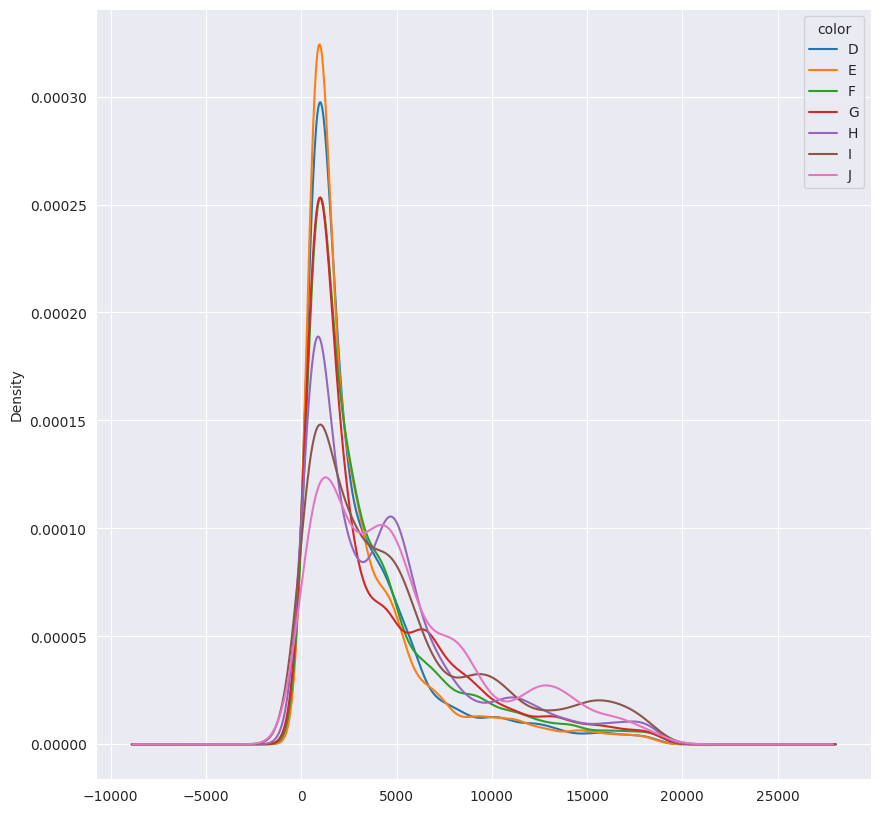

In [130]:
df[["price", "color"]].pivot(columns="color", values="price").plot.density(figsize=(10,10))

Is there a trend visible?
*

### Use vectorized commands (=no loops!) to answer these questions:

* How many diamonds have a price above 9500?

In [131]:
df[df["price"] > 9500]["price"].count()

5734

* How many diamonds have a price above 9500 and have color “D”?


In [132]:
df[(df["price"] > 9500) & (df["color"] == "D")]["price"].count()

461

* What is the mean and std of the price of all color “D” diamonds with cut “Fair”?

In [133]:
d_and_fair = df[(df["cut"] == "Fair") & (df["color"] == "D")]["price"]

print("mean: ", d_and_fair.mean())
print("std: ", d_and_fair.std())

mean:  4291.061349693252
std:  3286.1142381749964


* What is the median and mad of the price of all color “J” diamonds with cut “Ideal”?

In [134]:
j_and_ideal = df[(df["cut"] == "Ideal") & (df["color"] == "J")]["price"]

print("median: ", j_and_ideal.median())
print("mad: ", (j_and_ideal - j_and_ideal.mean()).abs().mean())

median:  4096.0
mad:  3467.5866823780293


* Create two copies of the dataframe that contains only the price and carat feature.  Apply a log with base 10 to both features in one of those dataframes, and square (𝑥′=  𝑥2) the features in the other dataframe. What is the mean and std of the transformed features in both dataframes?

In [135]:
import numpy as np

copy_1 = df[["price", "carat"]]
copy_2 = df[["price", "carat"]]

log_10 = np.log10(copy_1)
squared = (copy_2 ** 2)

print("log_10:")
print("mean:")
print(log_10.mean())
print("std:")
print(log_10.std())
print("squared:")
print("mean:")
print(squared.mean())
print("std:")
print(squared.std())


log_10:
mean:
price    3.381751
carat   -0.171532
dtype: float64
std:
price    0.440657
carat    0.253987
dtype: float64
squared:
mean:
price    3.138225e+07
carat    8.613903e-01
dtype: float64
std:
price    6.049189e+07
carat    1.056506e+00
dtype: float64
